# Hypothesis Testing - Guided Practice

- ds-flex 
- xx/xx/xx

# 📚Hypothesis Testing Steps

<img src="https://raw.githubusercontent.com/learn-co-curriculum/dsc-experimental-design/master/images/new_the-scientific-method.png" width=50%>

## Overview

1. State the null hypothesis ($H_0$) and the alternative hypothesis ($H_A$ or $H_1$)


2. Determine the correct test to perform.
    - What test is appropriate for your hypothesis?
    - What value should we use for $\alpha$? (e.g.: .05, .01,.001 ?)
    
    
3. Prepare the data and perform the selected test. 

4. Interpret the resulting p-value (reject or fail to reject the null hypothesis) 

5. Perform posthoc tests (if necessary)

### STEP 1: State Your Hypothesis & Null Hypothesis 

- **Before selecting the correct hypothesis test, you must first officially state your null hypothesis ($H_0$) and alternative hypothesis ($H_A$ or $H_1$)**



- **Before stating your hypotheses, ask yourself:**
    1. What question am I attempting to answer?
    2. What metric/value am I measuring to answer this question?
    3. Do I expect the groups to be different in a specific way? (i.e. one group greater than the other).
        - Or do I just think they'll be different, but don't know how?


### STEP 2: Determine the correct test for the data/hypothesis

<!-- based on data type and # of samples/groups -->

#### Q1: What type of data am I measuring? Is it numeric or categorical?


#### Q2: How many groups/samples am I comparing?
- One group vs a known value?
- Two groups?
- More than two groups?


#### Using the answers to the above 2 questions: select the type of test from this table.

|*What type of comparison?* | Numeric Data | Categorical Data|
| --- | --- | --- |
|**1 Sample vs Known Quantity/Target**|1 Sample T-Test| Binomial Test|
|**2 Samples** | 2 Sample T-Test| Chi-Square|
|**More than 2**| ANOVA and/or Tukey | Chi Square|


#### What probability will we use as our significance cutoff?

- Set your $\alpha$ level (typically $\alpha$ =.05)
    - How rare should the value be before we consider it to be an outlier/statistically significantly different?

<img src="../images/normal_sd_new.png" width="500">


### STEP 3: Perform the test

#### Hypothesis Testing Functions

```python
from scipy import stats
```

| Hypothesis test|Scipy Function | 
 | --- | --- |
 | **1-sample t-test** |`stats.ttest_1samp()`|
 | **2-sample t-test** |`stats.ttest_ind()` | 
 | **One-Way ANOVA** | `stats.f_oneway()` | 
 | **Binomial test** |`stats.binom_test()` |
 | **Chi-Square test** | `stats.chi2_contingency()`|
 
 

- **Perform the test to get your test-statistic and the associated p-value.**

### STEP 4: Interpret the test result and perform any post-hoc test



#### Interpret your p-value compared to $\alpha$


- **If p > $\alpha$:**:
    - We fail to reject the null hypothesis.
        - The observed difference likely occurred due to random chance, not do to the effect we were analyzing.
        - We have essentially disproved our hypothesis.
    - The result is not significant.
    
    
- **If p is < $\alpha$:**
    - We reject the null hypothesis. 
        - The observed difference was most likely NOT due to random chance.
        - We have "supported" our hypothesis. (we NEVER "prove" our hypothesis)
    - The result is significant.


<img src="https://imgs.xkcd.com/comics/p_values.png">

#### Next Steps 
- **If we did not have significant results:**
    - We are done! Write up the final answer. 
    
- **If we had significant results:**

    - If there are 2 groups:
        - Use a visualization to confirm which group had the larger/smaller value. (e.g. a barplot).
        - Calculate effect size (e.g. Cohen's $d$)
        - Write up the final answer.

    - If there are >2 groups:
        - Run a pairwise multiple-comparison test (e.g. Tukey's test) to determine which groups were different.
            - [Tukey pairwise comparison test](https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html) (`statsmodels.stats.multicomp.pairwise_tukeyhsd`)


- Report statistical power (optional)

#### Post-Hoc Functions:

| Post-Hoc Tests/Calculatons|Function|
|--- | --- |
|**Tukey's Pairwise Comparisons** | `statsmodels.stats.multicomp.pairwise_tukeyhsd`|
|**Effect Size**| `Cohens_d`|
|**Statistical Power** | `statsmodels.stats.power`:<br>  `TTestIndPower` , `TTestPower`

## Resources 

- See the included [Hypothesis Testing Slide Deck](https://github.com/flatiron-school/ds-flex-hypothesis-testing-guided-practice/blob/main/resources/Hypothesis%20Testing%20with%20SciPy_codeacademy%20slides.pdf) for a recap of the process.

- See the included [Hypothesis Testing with Scipy Cheatsheet](https://github.com/flatiron-school/ds-flex-hypothesis-testing-guided-practice/blob/main/resources/hypothesis-testing-with-scipy%20cheatsheet.pdf)

- Both are also included in the `resources` folder, as well

# 🕹Activity: Hypothesis Testing with Insurance Data

In [1]:
## import the standard packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## import hypothesis testing functions
from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf


%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import functions as fn

## US Health Insurance Dataset

- https://www.kaggle.com/teertha/ushealthinsurancedataset

In [2]:
# Load in the insurance.csv in the data folder and display preview
df = pd.read_csv("../data/insurance.csv")
display(df.head())
df.info()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Questions to Answer

>- Q1. Do smokers have higher insurance charges than non-smokers?
>- Q2. Are women and men equally likely to be smokers?
>- Q3. Do different regions have different charges, on average?
>- [Level Up]: Q4: Do insurance companies charge smokers vs non-smokers different amounts for men vs women?

## Q1: Do smokers have higher insurance charges than non-smokers?

#### Formally State the Hypothesis

- $H_1$ : Smokers have higher charges than non-smokers.

- $H_0$ : Smokers and non-smokers are charged the same. 

#### Determine the Correct Statistical Test 

- Q1: What type of data are we comparing?
    - A: Numeric (charges)
    
    
- Q2: How many samples/groups are being compared?
    - A: 2 smokers vs. non-smokers
    
    
- Therefore, the correct test to perform would be:
    - A: 2-sample T-Test

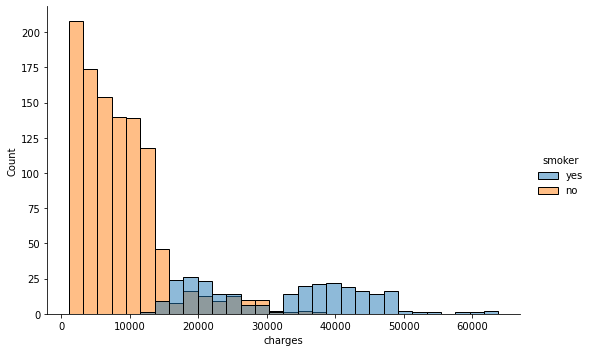

In [3]:
## let's visualize the distribution of charges for smokers and non-smokers
g = sns.displot(data=df,hue='smoker',x='charges',aspect=1.5)

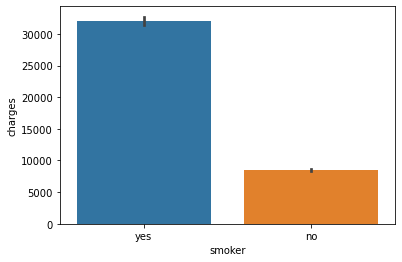

In [4]:
## let's visualize the average charges for smokers and non-smokers
sns.barplot(data=df,x='smoker',y='charges',ci=68);

In [5]:
## save all charges for smokers in a new smokers variable
smokers = df.loc[ df['smoker']=='yes','charges']
smokers

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [6]:
## now do the same for the non-smokers
nonsmokers = df.loc[ df['smoker']=='no','charges']
nonsmokers

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [7]:
## Run the correct hypothesis test from scipy
result = stats.ttest_ind(smokers,nonsmokers)
result

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

In [8]:
## interpret the p-value 
round(result.pvalue,6)

0.0

In [9]:
# is the result significant?
result.pvalue < .05

True

In [10]:
# HOW significant? (<.01? <.001?? <.000000001???)
result.pvalue < .0001

True

In [11]:
## calcualte the effect size using cohen's d
d = fn.Cohen_d(smokers,nonsmokers)
d

INTERPRETATION OF COHEN's D: 
    > Small effect = 0.2
    > Medium Effect = 0.5
    > Large Effect = 0.8
    


3.160132313169358

### Conclusion/Interpretation

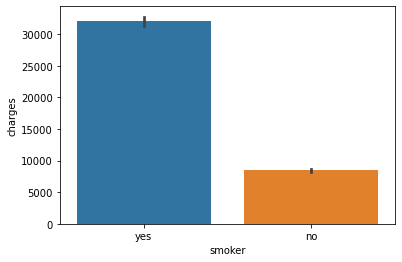

In [12]:
## Make a barplot of the average charges for smokers vs non-smokers
ax = sns.barplot(data=df,x='smoker',y='charges',ci=68)

>- Smokers have significantly higher insurance charges than non-smokers (p<.0001), with a large effect size (Cohen's d=3.16). 

## Q2: Are women and men equally likely to be smokers?

#### Formally State the Hypothesis
- $H_1$ : Men are more likely to smoke than women. 

- $H_0$ : Men and women are equally likelt to be smokers.

#### Determine the Correct Statistical Test 

- Q1: What type of data are we comparing?
    - A:  Categorical
    
    
- Q2: How many samples/groups are being compared?
    - A:  2 samples
    
    
- Therefore, the correct test to perform would be:
    - A: Chi-Square Test

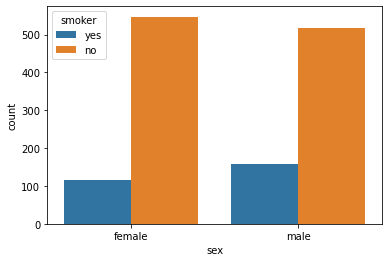

In [13]:
## Visualize the # of smokers by sex
sns.countplot(data=df,x='sex',hue='smoker');

In [14]:
## Get contingency table for smoker x sex using pd.crosstab
observed = pd.crosstab(df['sex'],df['smoker'])
observed

smoker,no,yes
sex,,
female,547,115
male,517,159


In [15]:
## perform the correct test for the hypothesis
stat,p,dof, expected =stats.chi2_contingency(observed)
print(p)
expected

0.006548143503580696


array([[526.43348281, 135.56651719],
       [537.56651719, 138.43348281]])

In [16]:
## interpret the p-value 
round(p,6)

0.006548

In [17]:
# is the result significant?
p <.05

True

In [18]:
# HOW significant? (<.01? <.001?? <.000000001???)
p < .01

True

### Conclusion/Interpretation

In [19]:
# get the contigency table again, but normalzie it by sex
pd.crosstab(df['sex'],df['smoker'],normalize='index')

smoker,no,yes
sex,,
female,0.826284,0.173716
male,0.764793,0.235207


>- Men are significantly more likely to be smokers than women (p<.01).

## Q3: Do different regions have different insurance charges?

#### Formally State the Hypothesis
- $H_1$ : Average insurance charges vary across regions.
- $H_0$ : Average insurance are the same for all regions.

#### Determine the Correct Statistical Test 

- Q1: What type of data are we comparing?
    - A: Numeric (charges)
    
    
- Q2: How many samples/groups are being compared?
    - A: >2 (4 regions)
    
    
- Therefore, the correct test to perform would be:
    - A: one-way ANOVA

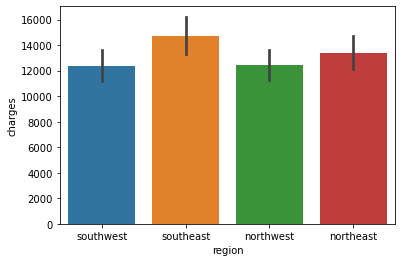

In [20]:
## visualize the regions vs charges
sns.barplot(data=df, x='region',y='charges');

### Performing the ANOVA with `scipy`

In [21]:
## separate the data into groups
groups = {}

for region in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[ df['region']==region, 'charges']
    data.name = region
    
    # save into the dictionary
    groups[region] = data

groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [23]:
# perform the correct hypothesis test
# method 1 - manual slicing 
result = stats.f_oneway(groups['northeast'],
                       groups['northwest'],
                       groups['southeast'],
                        groups['southwest'])
result

F_onewayResult(statistic=2.9696266935891193, pvalue=0.0308933560705201)

In [22]:
# perform the correct hypothesis test
# method 2 - using * to unpack
result = stats.f_oneway(*groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

In [24]:
## interpret the p-value 
round(result.pvalue,6)

0.030893

In [25]:
# is the result significant?
result.pvalue < .05

True

In [26]:
# HOW significant? (<.01? <.001?? <.000000001???)
result.pvalue < .01

False

### Perform ANOVA with `statsmodels`

In [27]:
## Create a formula to explain charges using the category of "region"
f = "charges ~ C(region)"

## Make and fit an ols model 
model = smf.ols(f,data=df).fit()

# Use statsmodels anova_lm function with the model 
results = sm.stats.anova_lm(model)
results.round(4)

,df,sum_sq,mean_sq,F,PR(>F)
C(region),3.0,1.300760e+09,4.335866e+08,2.9696,0.0309
Residual,1334.0,1.947735e+11,1.460071e+08,NaN,NaN


### Posthoc Multiple Comparison Test: Determine which pairs of groups were different

In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the charges column as values and the region as labels
values = df['charges']
labels = df['region']

In [29]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7002,-3428.9473,1451.329,False
northeast,southeast,1329.0269,0.4754,-1044.9543,3703.0081,False
northeast,southwest,-1059.4471,0.6584,-3499.5853,1380.691,False
northwest,southeast,2317.8361,0.0583,-54.212,4689.8842,False
northwest,southwest,-70.638,0.9,-2508.8955,2367.6195,False
southeast,southwest,-2388.4741,0.0477,-4760.5221,-16.426,True


### Conclusion/Interpretation

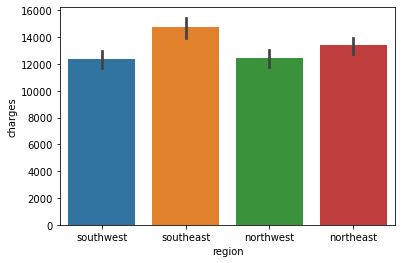

In [30]:
## Make a barplot using ci=68 (Standard Error of the Mean)
sns.barplot(data=df, x='region',y='charges',ci=68);

>-  Average insurance charges are different for different regions (p<.05). Specifically, charges are significantly higher in the southwest vs the southeast,

## [Level Up]: Q4: Do insurance companies charge smokers vs non-smokers different amounts for men vs women?

#### Formally State the Hypothesis
- $H_1$ : Men and women are charged different amounts for being a smoker vs non-smoker.
- $H_0$ : Men and women are charged the same regardless of whether they smoke or not.

#### Determine the Correct Statistical Test 

- Q1: What type of data are we comparing?
    - A: Numeric (charges)
    
    
- Q2: How many samples/groups are being compared?
    - A: Two Sexes (M/F) x Two Smoking Groups (Smoker/Non-Smoker).
    


<details>
    <summary style='font-weight:bold;'>> Therefore, the correct test to perform would be... (click to expand) </summary>
   <ul>
       <li style="font-weight:bold;">A: Two-Way ANOVA!  https://www.statology.org/two-way-anova-python/</li>
    </ul>
</details>


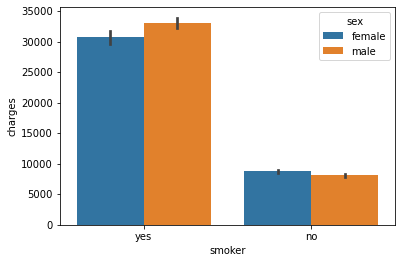

In [31]:
## Visualzie the average charges for smokers vs non-smokers, separated by sex
ax = sns.barplot(data=df, x='smoker',y='charges',hue='sex',ci=68)

In [32]:
## Make the formula to explain charges with the categories of smoker and sex
f = "charges ~ C(smoker)+C(sex)"
model = smf.ols(f,data=df).fit()

## Calculate the two-way anova using your model
results = sm.stats.anova_lm(model,typ=2)
results

,sum_sq,df,F,PR(>F)
C(smoker),1.208777e+11,1.0,2164.527244,1.190490e-281
C(sex),1.421312e+06,1.0,0.025451,8.732723e-01
Residual,7.455290e+10,1335.0,NaN,NaN


In [33]:
## interpret the p-value for smokers
p_smoker = results.loc['C(smoker)', "PR(>F)"]
round(p_smoker,6)

0.0

In [34]:
## is the p-value for smoker significant?
p_smoker<.05

True

In [35]:
##HOW significant?
p_smoker<.00001

True

In [36]:
## interpret the p-value for sex
p_sex = results.loc['C(sex)', "PR(>F)"]
round(p_sex,6)

0.873272

In [37]:
## is the p-value for sex significant?
p_sex<.05

False

### Conclusion

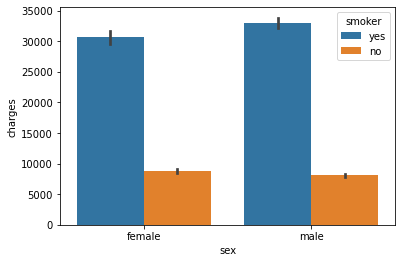

In [38]:
## Visualzie the average charges for males vs females, separated by smokers
ax = sns.barplot(data=df, x='sex',y='charges',hue='smoker',ci=68)

>- There was no significant difference in insurance charges across sex (p=.87), but there were significantly higher charges for smokers, in general (p<.00001)

# Conclusion/Recap

- Today we walked through testing several hypothesis that required different statistical tests. 
- We walked through setting our hypothesis and null hypothesis.
- We then selected the right test based upon the type of data we were using and how many groups we were comparing. 

- We performed the chosen test, interpreted the p-value, and performed posthoc tests as needed.


- We learned that there are more advanced statistical tests than what is included in the curriculum.


# APPENDIX

## Your Turn! Think of another Hypothesis to test.

- example: Is our sample's BMI representative of the the national average BMI? (See the pdf in the data folder for the stats)

#### Formally State the Hypothesis
- $H_1$ :
- $H_0$ : 

#### Determine the Correct Statistical Test 

- Q1: What type of data are we comparing?
    - A: |
    
    
- Q2: How many samples/groups are being compared?
    - A: 
    
    
- Therefore, the correct test to perform would be:
    - A: